### 직접 unlabeled noise를 들어본 뒤 noise부분만 잘라서 저장하는 코드입니다.
### 이후 해당 노이즈를 좌우대칭, 이어붙이기 등의 과정을 통해 5초로 만들어 저장한 것이 unlabeled_data 내부 데이터 입니다.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import torch
import torchaudio
import torchvision.transforms
from PIL import Image
import pandas as pd
import os
import IPython.display as ipd
import soundfile as sf



# Utils

In [2]:
def _get_extract_spectrogram( y):
    sr = 32000
    num_channels = 3
    window_sizes = [25, 50, 100]
    hop_sizes = [10, 25, 50]

    specs = []
    for i in range(num_channels):
        window_length = int(round(window_sizes[i] * sr / 1000))
        hop_length = int(round(hop_sizes[i] * sr / 1000))
        
        y = torch.Tensor(y)
        spec = torchaudio.transforms.MelSpectrogram(
            sample_rate=sr, n_fft=3200, win_length=window_length, hop_length=hop_length, n_mels=128
        )(y)
        eps = 1e-6
        spec = spec.numpy()
        spec = np.log(spec + eps)
        spec = np.asarray(torchvision.transforms.Resize((128, 250))(Image.fromarray(spec)))

        specs.append(spec)

    return np.array(specs)

In [3]:
def plot_audio_data(data, title, ax_wave, ax_spec):
    # Plot waveform
    ax_wave.plot(data)
    ax_wave.set_title(f'{title} - Waveform')
    ax_wave.set_xlabel('Sample')
    ax_wave.set_ylabel('Amplitude')

    # Plot spectrogram
    specs = _get_extract_spectrogram(data)
    im = ax_spec.imshow(specs[1], aspect='auto', origin='lower', cmap='viridis')
    ax_spec.set_title(f'{title} - Mel Spectrogram')
    ax_spec.set_xlabel('Time')
    ax_spec.set_ylabel('Mel Frequency')
    plt.colorbar(im, ax=ax_spec)

In [4]:
def get_librosa_audio_data(file_name):
    y, sr = librosa.load("./data/unlabeled_data/" + file_name + '.ogg', sr=32000)
    return y

In [5]:
# audio ipynb 파일에서 듣는 함수
def play_audio(data, sample_rate=32000):
    return ipd.Audio(data=data, rate=sample_rate)

In [6]:
def play_audio_segment(data, start_time, end_time):
    """
    오디오 파일의 특정 구간을 잘라서 재생하는 함수
        :param start_time: 재생 시작 시간 (초)
    :param end_time: 재생 종료 시간 (초)
    """
    
    # 시작과 종료 샘플 인덱스 계산
    start_sample = int(start_time * 32000)
    end_sample = int(end_time * 32000)
    
    # 오디오 구간 자르기
    audio_segment = data[start_sample:end_sample]
    
    # 잘린 오디오 구간 재생
    return ipd.Audio(data=audio_segment, rate=32000)

In [15]:
# 저장 함수
def save_audio_segment(data, start_time, end_time, output_path, sample_rate=32000):
    """
    오디오 파일의 특정 구간을 잘라서 저장하는 함수
    
    :param data: 오디오 데이터 (numpy array)
    :param start_time: 잘라낼 구간의 시작 시간 (초)
    :param end_time: 잘라낼 구간의 종료 시간 (초)
    :param output_path: 잘라낸 오디오를 저장할 경로
    :param sample_rate: 샘플 레이트 (기본값: 32000)
    """
    
    # 시작과 종료 샘플 인덱스 계산
    start_sample = int(start_time * sample_rate)
    end_sample = int(end_time * sample_rate)
    
    # 오디오 구간 자르기
    audio_segment = data[start_sample:end_sample]

    output_path = "./data/unlabeled_noise_only/" + output_path + "_noise.ogg"
    # 잘린 오디오 구간을 파일로 저장
    sf.write(output_path, audio_segment, sample_rate)
    
    print(f"Audio segment saved to {output_path}")

# noise Substract

## file name

BTEKPHQI
BYJDOELP
CAAGJRBF
DPPZJCDR
DTZJEVNP
DZRBWVOK
EEGWEFGR
EFLPLMXF
EJAKQAOU
EKFKDMLY
EOVNLVEZ
FBACVNYO
FECQOKCU
FKDKXCGF
FWQPUPXG
GAMHXBDV
GDNSJPOL
GEEAAQLZ
GEFIMATF
GJCHONJH
GJNSVOZO
HLFIRNGP
HOROHFDF
HVOIHZOP
HVSOAZWV
HZINFDJM
QYCZEQVY
QZXTJOCD
QZZFDLZM
RAIFAKSF
RBTDUMID
RCFDTKBB
RCYUSKWL
RISPPGBS
RYCIFDAI
RZCGCZCU
RZOKPCBE
SKIJXLJE
SLHATYJZ
SLXEMPOQ
SWGEYIFU
SYNAXTBM
TJSTYMTB
TJVFOMEN
TWKBKGIZ
UIWYLJPG
UJXXTSTO
ULGPQONR
VFFQTEOS
VNNLVAOT
VRAPFXUQ
VRHZCIYF
WEZYDJBB
WNDYIMOJ
WPGUZRTH
XBUSHANN
XEDSNXGQ
XJQCCIWQ
XJQJLGLJ
XPCIUBPA
XTPWFLBB
XUJXSYIO
XZRPLXEO
YAIWFSZI
YLVROMCE
ZAHHAYYZ
ZAWVMAED
ZJFKBZBM
ZJMIEUOH
ZNKNSNKR
KYIGQPBG
LIYJXEYK
LNNMTLMR
LPAOYJPR
LYXZFYVC
LZONNTRL
MKBATNXF
MNQVYYNY
MOWOJPZT
NBGUAWIC
NDYFZXFH
NEDOBQLZ
NGZRWVWH
NZSFPFUB
QELAYSWG
OKUYKDUP
OKVDHOUB
IDGCRVPB
IFINDAEM
IHHMQUKL
JQZTXZMK
JUHAVKVK
KGEDIUFD
KHQYSGPV
KBRRQCOC
KGEDIUFD
KHQYSGPV
KUYQUNON
KVNWGQGA
KXBLURBB
KYIGQPBG
LIYJXEYK
LNNMTLMR
LPAOYJPR
LYXZFYVC
LZONNTRL
MKBATNXF
MNQVYYNY
MOWOJPZT
NBGUAWIC
NDYFZXFH
NEDOBQLZ
NGZRWVWH
NZSFPFUB
QELAYSWG
OKUYKDUP
OKVDHOUB
IDGCRVPB
IFINDAEM
IHHMQUKL
JQZTXZMK
JUHAVKVK
KGEDIUFD
KHQYSGPV
KBRRQCOC
KGEDIUFD
KHQYSGPV
KUYQUNON
KVNWGQGA
KXBLURBB


## Code

In [16]:
file_name = "KXBLURBB"

In [17]:
data = get_librosa_audio_data(file_name)

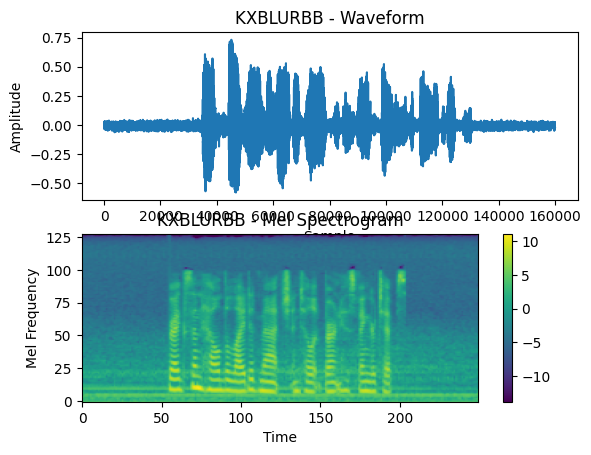

In [18]:
plot_audio_data(data, file_name, plt.subplot(2, 1, 1), plt.subplot(2, 1, 2))

In [19]:
play_audio(data, 32000)

In [20]:
play_audio_segment(data, 0, 1)

In [21]:
save_audio_segment(data, 0, 1, file_name)

Audio segment saved to ./data/unlabeled_noise_only/KXBLURBB_noise.ogg


# Noise agumentation

In [22]:
def extend_and_extract_random_audio(input_file, output_file, target_duration=5.0, sr=32000):
    # 오디오 파일 로드
    audio, sr = librosa.load(input_file, sr=sr)
    
    # 목표 샘플 수 계산
    target_samples = int(target_duration * sr)
    
    # 초기화
    extended_audio = audio.copy()
    
    while len(extended_audio) < target_samples:
        # 좌우 반전 수행
        reversed_audio = np.flipud(audio)
        
        # 이어붙임
        extended_audio = np.concatenate((extended_audio, reversed_audio))
    
    # 길이가 목표치를 초과하는 경우 잘라냄
    extended_audio = extended_audio[:target_samples]
    
    # 저장
    sf.write(output_file, extended_audio, sr)


In [23]:
file_list = os.listdir("./data/unlabeled_noise_only")

In [24]:
for file in file_list:
    input_file = "./data/unlabeled_noise_only/" + file
    output_file = "./data/valid_noise/" + file
    extend_and_extract_random_audio(input_file, output_file)